# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
df = df.dropna()
df

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,2016-03-01,11477,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12427 non-null  int64  
 1   data_ref               12427 non-null  object 
 2   id_cliente             12427 non-null  int64  
 3   sexo                   12427 non-null  object 
 4   posse_de_veiculo       12427 non-null  bool   
 5   posse_de_imovel        12427 non-null  bool   
 6   qtd_filhos             12427 non-null  int64  
 7   tipo_renda             12427 non-null  object 
 8   educacao               12427 non-null  object 
 9   estado_civil           12427 non-null  object 
 10  tipo_residencia        12427 non-null  object 
 11  idade                  12427 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  12427 non-null  float64
 14  renda                  12427 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [6]:
df = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [7]:
df.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


1 - Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [9]:
y, X = patsy.dmatrices('renda ~ sexo + posse_de_imovel + tempo_emprego + posse_de_veiculo + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + 1', df[:5])
X

DesignMatrix with shape (5, 13)
  Columns:
    ['Intercept',
     'sexo[T.M]',
     'posse_de_imovel[T.True]',
     'posse_de_veiculo[T.True]',
     'tipo_renda[T.Empresário]',
     'tipo_renda[T.Servidor público]',
     'educacao[T.Superior completo]',
     'estado_civil[T.Solteiro]',
     'tipo_residencia[T.Governamental]',
     'tempo_emprego',
     'qtd_filhos',
     'idade',
     'qt_pessoas_residencia']
  Terms:
    'Intercept' (column 0)
    'sexo' (column 1)
    'posse_de_imovel' (column 2)
    'posse_de_veiculo' (column 3)
    'tipo_renda' (columns 4:6)
    'educacao' (column 6)
    'estado_civil' (column 7)
    'tipo_residencia' (column 8)
    'tempo_emprego' (column 9)
    'qtd_filhos' (column 10)
    'idade' (column 11)
    'qt_pessoas_residencia' (column 12)
  (to view full data, use np.asarray(this_obj))

In [10]:
y

DesignMatrix with shape (5, 1)
    renda
  8060.34
  1852.15
  2253.89
  6600.77
  6475.97
  Terms:
    'renda' (column 0)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

2 - Rode uma regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o  𝑅2
  na base de testes. Qual o melhor modelo?

In [23]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.1)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:15:54   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.05)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:16:53   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.01)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:16:58   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.005)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:17:00   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.001)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:17:01   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:17:04   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando a regressão Ridge e modificando os alphas não conseguimos obter uma variação significativa nos resultados com as variações de alpha. Logo, o R2 fica praticamente imutável com valor de 0.253.

Faça o mesmo que no passo 2, com uma regressão LASSO. Qual método chega a um melhor resultado?

In [29]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:22:20   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.001)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:23:20   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.005)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:23:21   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:23:21   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:23:22   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:23:22   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando a regressão Lasso e modificando os alphas não conseguimos obter uma variação significativa nos resultados com as variações de alpha. Logo, o R2 fica praticamente imutável com valor de 0.253, mesmo valor obtido na regressão Ridge.

4 - Rode um modelo stepwise. Avalie o  𝑅2
  na base de testes. Qual o melhor resultado?

In [37]:
data = pd.read_csv('previsao_de_renda.csv')
data = df.dropna()
data.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [38]:
data['idade'] = data['idade'].astype(float)
data['qtd_filhos'] = data['qtd_filhos'].astype(float)

In [40]:
X = data.drop(['renda', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'qtd_filhos'], axis=1)
y = data['renda']

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   idade                  12427 non-null  float64
 1   tempo_emprego          12427 non-null  float64
 2   qt_pessoas_residencia  12427 non-null  float64
dtypes: float64(3)
memory usage: 388.3 KB


In [42]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  qt_pessoas_residencia          with p-value 1.01297e-07
#############
['tempo_emprego', 'qt_pessoas_residencia']
#############
['tempo_emprego', 'qt_pessoas_residencia']
resulting features:
['tempo_emprego', 'qt_pessoas_residencia']


In [43]:
reg = smf.ols('renda ~ tempo_emprego + qt_pessoas_residencia' , data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     1098.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:40:07   Log-Likelihood:            -1.2962e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12424   BIC:                         2.593e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1186.8746    217.181      5.465      0.000     761.167    1612.583
tempo_emprego           513.8531     10.979     46.802      0.000     492.332     535.374
qt_pessoas_residencia   417.3730     78.343      5.328      0.000     263.809     570.937
==============================================================================
Omnibus:                    17043.387   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7733166.839
Skew:                           7.728   Prob(JB):                         0.00
Kurtosis:                     124.227   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5 - Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?


O modelo de regularização LASSO e RIDGE representam a melhor opção com relação a stepwise. Considerando o R2 no valor de 0.253 nas regularizações realizadas.


6 - Partindo dos modelos que você ajustou, tente melhorar o  𝑅2  na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.



In [44]:
modelo = 'renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + idade + tempo_emprego + qt_pessoas_residencia + qtd_filhos'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     524.6
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:42:20   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -2835.4324    458.452     -6.185      0.000   -3734.070   -1936.795
C(sexo)[T.M]                 5964.8232    154.398     38.633      0.000    5662.180    6267.466
C(posse_de_veiculo)[T.True]   136.9497    149.532      0.916      0.360    -156.156     430.055
C(posse_de_imovel)[T.True]    381.6499    145.808      2.617      0.009      95.844     667.456
idade                          41.6307      8.149      5.108      0.000      25.656      57.605
tempo_emprego                 550.1176     10.910     50.424      0.000     528.733     571.502
qt_pessoas_residencia         256.4967    172.104      1.490      0.136     -80.853     593.847
qtd_filhos                   -117.3403    205.644     -0.571      0.568    -520.434     285.754
==============================================================================
Omnibus:                    17508.197   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9674977.012
Skew:                           8.075   Prob(JB):                         0.00
Kurtosis:                     138.736   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
modelo = 'np.log(renda) ~ C(sexo) +  C(posse_de_imovel) + idade + tempo_emprego'
md = smf.ols(modelo, data = df)
reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.001
                         , alpha = 0.001)


reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1310.
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        10:44:35   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.743e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.2790      0.031    233.591      0.000       7.218       7.340
C(sexo)[T.M]                   0.7895      0.014     57.276      0.000       0.762       0.817
C(posse_de_imovel)[T.True]     0.0898      0.014      6.512      0.000       0.063       0.117
idade                          0.0042      0.001      5.635      0.000       0.003       0.006
tempo_emprego                  0.0610      0.001     59.110      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.194   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.174
Skew:                           0.023   Prob(JB):                        0.556
Kurtosis:                       3.012   Cond. No.                         206.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Aplicando uma trasnformação logarítmica no eixo y e descartando algumas varíveis consideradas pouco significantes, conseguimos obter um R2 melhor que antes, variando de 0.253 para 0.345, explicando uma quantidade maior de variáveis.

7 - Ajuste uma árvore de regressão e veja se consegue um  𝑅2
  melhor com ela.

In [52]:
df_dummies = pd.get_dummies(df)

In [53]:
X = df_dummies.drop("renda",axis = 1)
y = df_dummies["renda"]

In [54]:
X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_F,sexo_M,tipo_renda_Assalariado,tipo_renda_Bolsista,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,False,True,0,26,6.602740,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,True,True,0,28,7.183562,2.0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,True,True,0,35,0.838356,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,False,True,1,30,4.846575,3.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,True,False,0,33,4.293151,1.0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1


In [55]:
y.head()

0    8060.34
1    1852.15
2    2253.89
3    6600.77
4    6475.97
Name: renda, dtype: float64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=2360873)

In [57]:
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=10)

regr_1.fit(X_test, y_test)
regr_2.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=10)

In [58]:
df_dtr_mse = mean_squared_error(y_test, regr_1.predict(X_test))
df_dtr_r2 = regr_1.score(X_test, y_test)
template = "Árvore teste profundidade: {0}, MSE: {1:.2f}, R2: {2:.6f}"
print(template.format(regr_1.get_depth(), df_dtr_mse, df_dtr_r2))

Árvore teste profundidade: 1, MSE: 72401487.05, R2: 0.130995


In [59]:
df_dtr_mse = mean_squared_error(y_test, regr_2.predict(X_test))
df_dtr_r2 = regr_2.score(X_test, y_test)
template = "Árvore teste profundidade: {0}, MSE: {1:.2f}, R2: {2:.6f}"
print(template.format(regr_2.get_depth(), df_dtr_mse, df_dtr_r2))

Árvore teste profundidade: 10, MSE: 20102721.36, R2: 0.758715


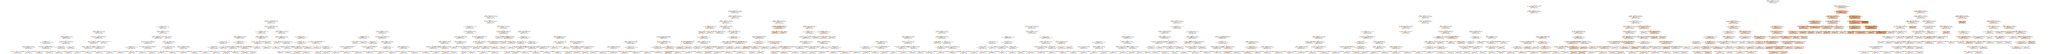

In [60]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

A árvore de teste com profundidade 10 (MSE: 20102721.36, R2: 0.758715) apresenta um valor melhor para R2 em comparação com as regressões LASSO e RIDGE com transformações (R2: 0,345).